✅ MNIST Dataset Loaded Successfully!
Training samples: (60000, 28, 28, 1)  | Testing samples: (10000, 28, 28, 1)
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9586 - loss: 0.1361 - val_accuracy: 0.9875 - val_loss: 0.0389
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9866 - loss: 0.0434 - val_accuracy: 0.9863 - val_loss: 0.0418
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9912 - val_loss: 0.0317
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9902 - val_loss: 0.0308
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9940 - loss: 0.0177 - val_accuracy: 0.9902 - val_loss: 0.0339
313/313 - 2s - 7ms/step - accuracy: 0.9893 - loss: 0.0349

✅ Test Accuracy: 0.9893


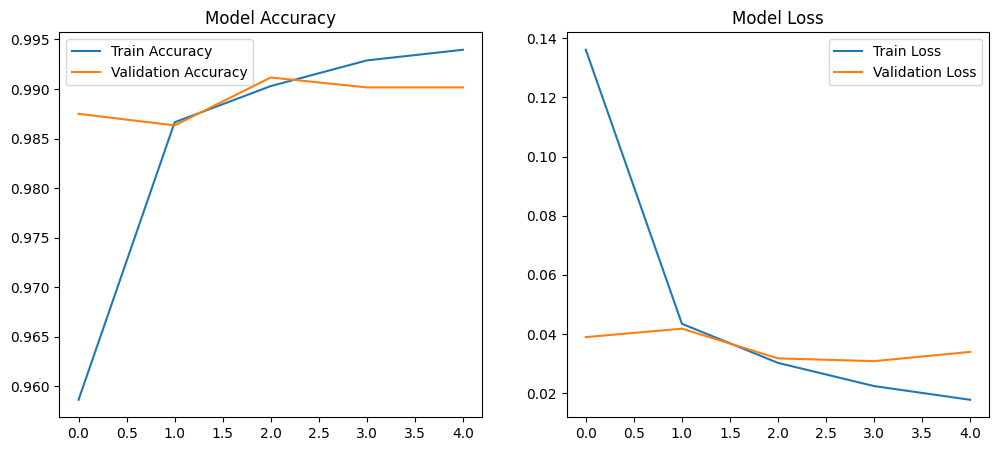

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


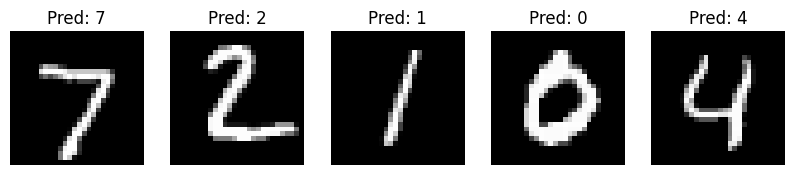

In [ ]:
# 📗 Part 2 - Task 2: Deep Learning with TensorFlow (CNN)
# Dataset: MNIST Handwritten Digits
# Goal: Achieve >95% accuracy in digit classification

# 1️Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#  Load and Preprocess Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print("MNIST Dataset Loaded Successfully!")
print("Training samples:", x_train.shape, " | Testing samples:", x_test.shape)

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Visualize Predictions on 5 Sample Images
predictions = model.predict(x_test)
plt.figure(figsize=(10,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()
